In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
current_dir = '/content/drive/MyDrive/Apziva/Term Deposit Marketing/'

In [3]:
data_dir =current_dir + 'term-deposit-marketing-2020.csv'

Attributes:

age : age of customer (numeric)

job : type of job (categorical)

marital : marital status (categorical)

education (categorical)

default: has credit in default? (binary)

balance: average yearly balance, in euros (numeric)

housing: has a housing loan? (binary)

loan: has personal loan? (binary)

contact: contact communication type (categorical)

day: last contact day of the month (numeric)

month: last contact month of year (categorical)

duration: last contact duration, in seconds (numeric)

campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

Output (desired target):

y - has the client subscribed to a term deposit? (binary)

In [4]:
# Start with loading all necessary libraries


import numpy as np
import pandas as pd


#visualizing data
import seaborn as sns  
import matplotlib.pyplot as plt 
import time

In [5]:
df  = pd.read_csv(data_dir)

# Exploring Dataset

In [6]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


In [7]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
y            object
dtype: object

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,40000.0,40.544600,9.641776,19.0,33.0,39.0,48.0,95.0
balance,40000.0,1274.277550,2903.769716,-8019.0,54.0,407.0,1319.0,102127.0
day,40000.0,16.017225,8.278127,1.0,8.0,17.0,21.0,31.0
duration,40000.0,254.824300,259.366498,0.0,100.0,175.0,313.0,4918.0
campaign,40000.0,2.882175,3.239051,1.0,1.0,2.0,3.0,63.0


In [9]:
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [10]:
df['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [11]:
df['default'].unique()

array(['no', 'yes'], dtype=object)

In [12]:
df['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [13]:
df['contact'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [14]:
df['loan'].unique()

array(['no', 'yes'], dtype=object)

In [15]:
def plot_distribution(df, feature, title):
    n_bins = int(df[feature].nunique())
    
    plt.figure(figsize = (10,5))
    plt.hist(x = feature, bins = n_bins, color = '#42929D', data = df, width=0.7)
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.title(title)
    return plt.show()

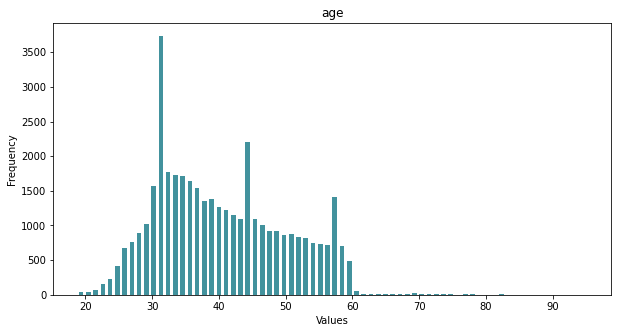

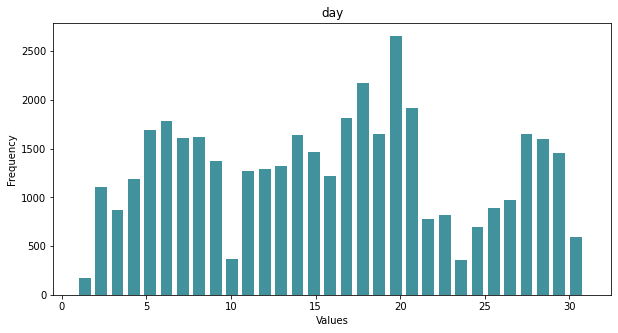

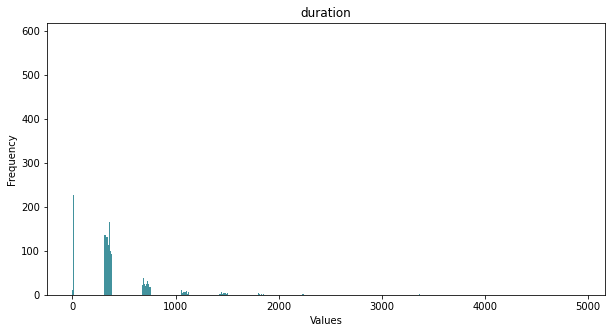

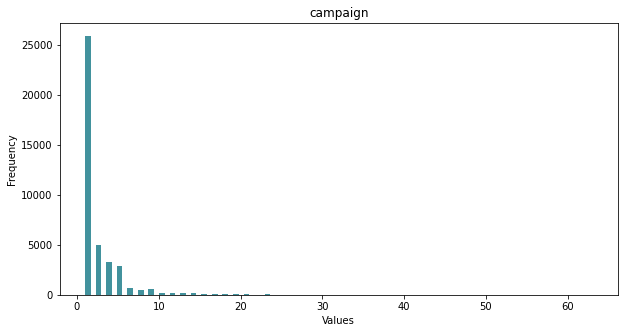

In [16]:
numeric_features = ['age', 'day', 'duration', 'campaign']

for feature in numeric_features:
  plot_distribution(df, feature, feature)

In [17]:
def plot_cont_distribution(df, feature, title):
    #n_bins = int(df[feature].nunique())
    
    plt.figure(figsize = (10,5))
    plt.plot(df['feature'], width=0.7)
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.title(title)
    return plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efea83460d0>]],
      dtype=object)

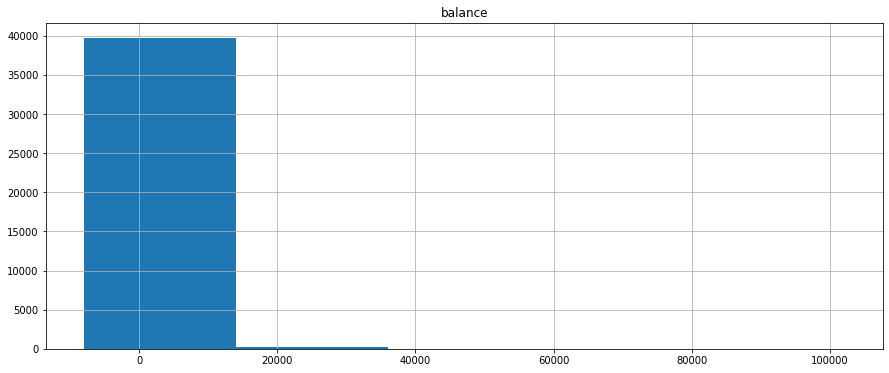

In [18]:
df.hist(column=['balance'],bins=5, figsize=(15,6))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7efea8144f10>,
      dtype=object)

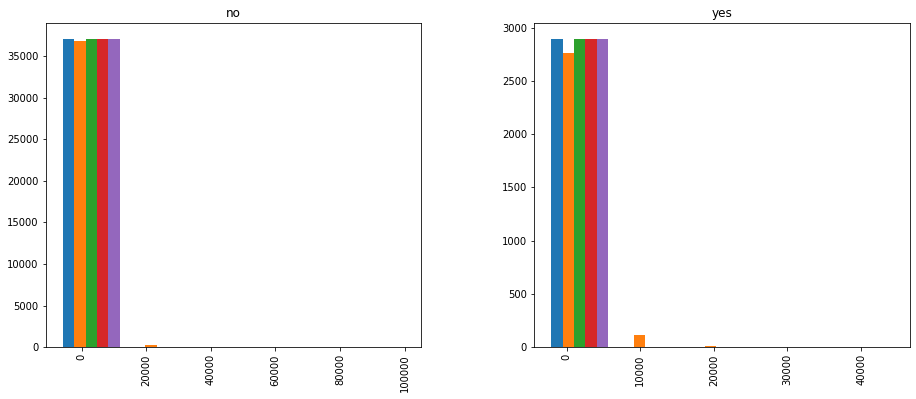

In [19]:
df.hist(column=['balance'], by= "y", bins=5, figsize=(15,6))

# Feature Engineering

In [20]:
#convert yes no to 0 and 1

In [21]:
def convert_yes_no(value):
    if value == 'yes':
        return 1
    else:
        return 0

In [22]:
df['y'] = df['y'].apply(lambda x:convert_yes_no(x))

In [23]:
df['housing'] = df['housing'].apply(lambda x:convert_yes_no(x))

In [24]:
df['loan'] = df['loan'].apply(lambda x:convert_yes_no(x))

In [25]:
df['default'] = df['default'].apply(lambda x: convert_yes_no(x))

In [26]:
def to_numeric_month(month: str):
  months_num_pair = {
        'jan': 1,
        'feb': 2,
        'mar': 3,
        'apr':4,
        'may':5,
        'jun':6,
        'jul':7,
        'aug':8,
        'sep':9,
        'oct':10,
        'nov':11,
        'dec':12
        }
  try:
    return months_num_pair[month]
  except:
    raise ValueError('given input is not a month')


In [27]:
df['month'] = df['month'].apply(lambda x: to_numeric_month(x))

In [28]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,5,261,1,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,5,151,1,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,5,76,1,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,5,92,1,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,5,198,1,0


# One Hot Encoding for the other variables

In [29]:
df = pd.get_dummies(df, columns=['marital'], prefix="marital", prefix_sep="_")

In [30]:
df = pd.get_dummies(df,columns=['education'], prefix='education', prefix_sep="_")

In [31]:
df = pd.get_dummies(df, columns=['contact'], prefix="contact", prefix_sep="_")

In [32]:
df = pd.get_dummies(df, columns=['job'], prefix="job", prefix_sep="_")

In [33]:
df.head()

,age,default,balance,housing,loan,day,month,duration,campaign,y,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,58,0,2143,1,0,5,5,261,1,0,...,0,0,1,0,0,0,0,0,0,0
1,44,0,29,1,0,5,5,151,1,0,...,0,0,0,0,0,0,0,1,0,0
2,33,0,2,1,1,5,5,76,1,0,...,1,0,0,0,0,0,0,0,0,0
3,47,0,1506,1,0,5,5,92,1,0,...,0,0,0,0,0,0,0,0,0,0
4,33,0,1,0,0,5,5,198,1,0,...,0,0,0,0,0,0,0,0,0,1


In [34]:
df.dtypes

age                    int64
default                int64
balance                int64
housing                int64
loan                   int64
day                    int64
month                  int64
duration               int64
campaign               int64
y                      int64
marital_divorced       uint8
marital_married        uint8
marital_single         uint8
education_primary      uint8
education_secondary    uint8
education_tertiary     uint8
education_unknown      uint8
contact_cellular       uint8
contact_telephone      uint8
contact_unknown        uint8
job_admin              uint8
job_blue-collar        uint8
job_entrepreneur       uint8
job_housemaid          uint8
job_management         uint8
job_retired            uint8
job_self-employed      uint8
job_services           uint8
job_student            uint8
job_technician         uint8
job_unemployed         uint8
job_unknown            uint8
dtype: object

In [35]:
# sns.pairplot(df)
# plt.show()

In [36]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,age,default,balance,housing,loan,day,month,duration,campaign,y,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
age,1.000000,-0.014857,0.081517,-0.179606,0.000041,-0.011689,0.095266,-0.036270,0.016204,-0.020273,0.161989,0.265630,-0.408589,0.177944,-0.095671,-0.068986,0.073293,-0.068206,0.120689,0.010386,-0.047348,-0.028956,0.027956,0.084920,-0.005302,0.333164,0.001712,-0.057227,-0.155146,-0.058308,0.008052,0.043904
default,-0.014857,1.000000,-0.070069,-0.019229,0.075006,0.006287,0.024472,-0.008597,0.012135,-0.006559,0.016748,-0.016458,0.005893,-0.000885,0.011528,-0.012513,0.000959,-0.002889,-0.015149,0.010602,-0.009384,0.004706,0.025645,0.000017,-0.000951,-0.003878,0.004233,-0.003038,-0.013429,-0.004516,0.007232,-0.006397
balance,0.081517,-0.070069,1.000000,-0.049946,-0.080596,0.011662,0.099736,0.014072,-0.008137,0.030232,-0.025910,0.023683,-0.007168,-0.020949,-0.063920,0.083069,0.011639,0.004086,0.029116,-0.018851,-0.024774,-0.041461,0.011692,0.003044,0.072172,0.015917,0.015771,-0.033618,0.000575,-0.012655,0.010020,0.010672
housing,-0.179606,-0.019229,-0.049946,1.000000,0.004266,-0.050622,-0.161402,0.022455,-0.054823,-0.054336,-0.004691,0.000680,0.002656,0.011533,0.093628,-0.098019,-0.036128,-0.141946,-0.059696,0.177530,0.039440,0.156122,0.003303,-0.086038,-0.067999,-0.112274,-0.032204,0.062391,-0.034034,-0.032180,-0.046197,-0.077605
loan,0.000041,0.075006,-0.080596,0.004266,1.000000,0.005838,0.044699,-0.003952,0.000582,-0.031029,0.015635,0.032651,-0.047122,-0.012951,0.065472,-0.041987,-0.047598,0.029800,-0.001727,-0.030119,0.025195,0.005674,0.038244,-0.016788,-0.037817,0.017406,-0.008934,0.031939,-0.047512,0.008396,-0.035591,-0.031734
day,-0.011689,0.006287,0.011662,-0.050622,0.005838,1.000000,0.142358,-0.032983,0.165429,-0.006420,-0.004055,0.005243,-0.002806,-0.029240,-0.010139,0.033773,0.002749,0.034320,0.037242,-0.054363,-0.008858,-0.035006,-0.003629,0.005355,0.026526,-0.002787,0.005080,-0.009461,-0.011183,0.031902,-0.005475,-0.009526
month,0.095266,0.024472,0.099736,-0.161402,0.044699,0.142358,1.000000,-0.021329,0.082301,-0.043784,0.004534,0.078751,-0.089598,-0.026221,-0.048553,0.085987,-0.025199,0.151014,0.033843,-0.173993,-0.041223,-0.074765,0.032590,0.034035,0.088300,-0.008003,0.032367,-0.035096,-0.066517,0.049305,-0.049130,0.006923
duration,-0.036270,-0.008597,0.014072,0.022455,-0.003952,-0.032983,-0.021329,1.000000,-0.088387,0.461169,0.007237,-0.029153,0.026703,-0.007313,0.006765,-0.000303,-0.003043,0.017624,-0.040379,0.001928,-0.008152,0.015951,0.000247,-0.007239,-0.010846,0.001675,0.008821,0.003569,-0.007175,-0.008469,0.017896,-0.007971
campaign,0.016204,0.012135,-0.008137,-0.054823,0.000582,0.165429,0.082301,-0.088387,1.000000,-0.040350,-0.019951,0.027962,-0.016179,0.004326,-0.027133,0.022487,0.009791,-0.017733,0.061620,-0.012468,-0.020156,-0.004635,-0.002619,0.002804,0.021105,-0.013881,0.004581,-0.010404,-0.008503,0.018915,-0.017052,0.017037
y,-0.020273,-0.006559,0.030232,-0.054336,-0.031029,-0.006420,-0.043784,0.461169,-0.040350,1.000000,0.014619,-0.056863,0.051721,-0.026786,-0.019683,0.046763,-0.007464,0.085433,-0.000842,-0.088408,0.008083,-0.032859,-0.007191,-0.015248,0.020291,0.024343,0.005029,-0.014645,0.037384,0.000234,0.009463,-0.000018


In [37]:
#separate the Target and Features
target = df['y'] 
features = df.drop(['y'], axis=1)

In [38]:
target.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [39]:
features.head()

,age,default,balance,housing,loan,day,month,duration,campaign,marital_divorced,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,58,0,2143,1,0,5,5,261,1,0,...,0,0,1,0,0,0,0,0,0,0
1,44,0,29,1,0,5,5,151,1,0,...,0,0,0,0,0,0,0,1,0,0
2,33,0,2,1,1,5,5,76,1,0,...,1,0,0,0,0,0,0,0,0,0
3,47,0,1506,1,0,5,5,92,1,0,...,0,0,0,0,0,0,0,0,0,0
4,33,0,1,0,0,5,5,198,1,0,...,0,0,0,0,0,0,0,0,0,1


In [40]:
features.dtypes

age                    int64
default                int64
balance                int64
housing                int64
loan                   int64
day                    int64
month                  int64
duration               int64
campaign               int64
marital_divorced       uint8
marital_married        uint8
marital_single         uint8
education_primary      uint8
education_secondary    uint8
education_tertiary     uint8
education_unknown      uint8
contact_cellular       uint8
contact_telephone      uint8
contact_unknown        uint8
job_admin              uint8
job_blue-collar        uint8
job_entrepreneur       uint8
job_housemaid          uint8
job_management         uint8
job_retired            uint8
job_self-employed      uint8
job_services           uint8
job_student            uint8
job_technician         uint8
job_unemployed         uint8
job_unknown            uint8
dtype: object

# Imbalanced Data Tackling - Resampling

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


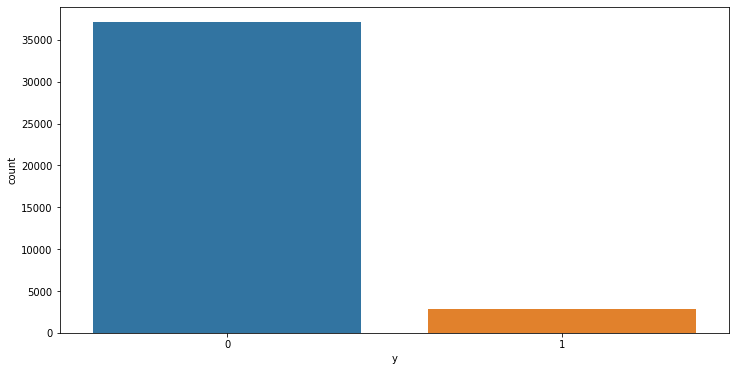

In [46]:
plt.figure(figsize=(12,6))
sns.countplot(df['y'])

In [47]:
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours

In [50]:
#Define SMOTE-ENN
resample=SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='all'))

In [51]:
X_res, y_res = resample.fit_resample(features, target)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


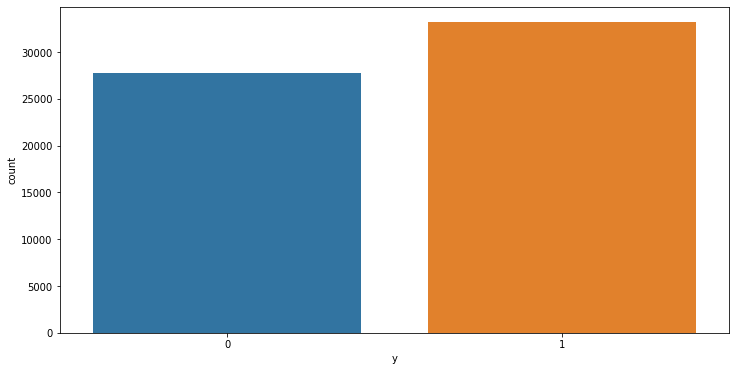

In [52]:
plt.figure(figsize=(12,6))
sns.countplot(y_res)

# Train Baseline Model

In [53]:
def conf_matrix(actual, predicted):
    """
      Function to generate confusion matrix from the predicted and actual classes

    """
    cm = confusion_matrix(actual, predicted)
    sns.heatmap(cm, xticklabels=['predicted_negative', 'predicted_positive'], 
                yticklabels=['actual_negative', 'actual_positive'], annot=True,
                fmt='d', annot_kws={'fontsize':20},cmap="Blues")

    true_neg, false_pos = cm[0]
    false_neg, true_pos = cm[1]

    accuracy = round((true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg),3)
    precision = round((true_pos) / (true_pos + false_pos),3)
    recall = round((true_pos) / (true_pos + false_neg),3)
    f1 = round(2 * (precision * recall) / (precision + recall),3)

    cm_results = [accuracy, precision, recall, f1]
    return cm_results

In [58]:
#model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV


from sklearn.preprocessing import StandardScaler, MinMaxScaler

#Model Training
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, RandomizedSearchCV


#Evaluation metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, roc_curve, roc_auc_score
from sklearn.inspection import permutation_importance

In [59]:
trans = StandardScaler()
new_features_scaled = trans.fit_transform(X_res)

In [60]:
clf = LogisticRegressionCV(cv=5, random_state=30).fit(new_features_scaled, y_res)

In [61]:
best_clf = clf.fit(new_features_scaled,y_res)

In [62]:
scores = cross_val_score(best_clf, new_features_scaled,y_res, cv=5)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [63]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.95 accuracy with a standard deviation of 0.05



The Training Score: 96.98987877495448 

The Accuracy is : 0.9698987877495447


              precision    recall  f1-score   support

           0       0.95      0.98      0.97     27772
           1       0.99      0.96      0.97     33189

    accuracy                           0.97     60961
   macro avg       0.97      0.97      0.97     60961
weighted avg       0.97      0.97      0.97     60961



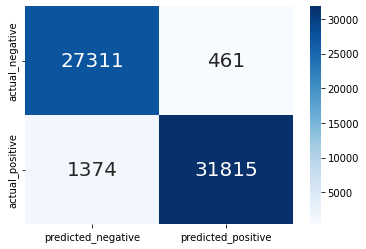

In [65]:
y_predict_logit = best_clf.predict(new_features_scaled)
acc_logit = accuracy_score(y_res, y_predict_logit)
print("\nThe Training Score: {} \n".format(best_clf.score(new_features_scaled,y_res)*100))
print('The Accuracy is : {}\n\n'.format(acc_logit))
cm_logit = conf_matrix(y_res, y_predict_logit)
print(classification_report(y_res, y_predict_logit))

# Model Development

In [ ]:
!pip install pycaret

In [ ]:
import pycaret

